Workshop #3,
Daniel Flores Rodríguez,
Agoust 22, 2022

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

Do a scatter plot including the regression line and interpret the plot

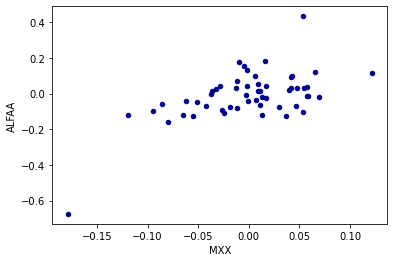

In [3]:
sr.plot.scatter(x='MXX', y='ALFAA',c='DarkBlue')
plt.show()

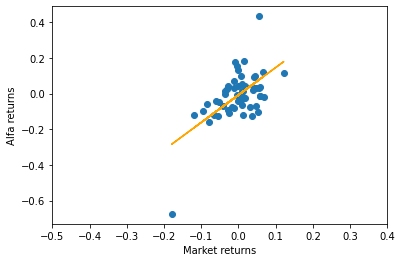

In [4]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


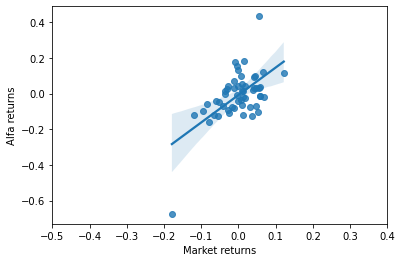

In [5]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

Run the market regression model (the Y=stock return, the X=market return). You can use the function OLS from the statsmodels.api library.

In [6]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()
 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.36e-06
Time:                        20:51:40   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.36e-06
Time:                        20:51:54   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

In [8]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00795217,  1.53870389])

Write down the regression equation

In [11]:
reg_eq = -0.007785460330175878 + 1.5394835507302118 * sr['MXX']
reg_eq

Date
2018-02-01   -0.102745
2018-03-01   -0.050999
2018-04-01    0.065006
2018-05-01   -0.130174
2018-06-01    0.092318
2018-07-01    0.056573
2018-08-01   -0.012449
2018-09-01   -0.009138
2018-10-01   -0.191251
2018-11-01   -0.087217
2018-12-01   -0.011202
2019-01-01    0.076652
2019-02-01   -0.049076
2019-03-01    0.008573
2019-04-01    0.038328
2019-05-01   -0.072943
2019-06-01    0.006981
2019-07-01   -0.092017
2019-08-01    0.057112
2019-09-01    0.006193
2019-10-01    0.003839
2019-11-01   -0.026265
2019-12-01    0.017915
2020-01-01    0.012143
2020-02-01   -0.108156
2020-03-01   -0.283218
2020-04-01    0.075276
2020-05-01   -0.022519
2020-06-01    0.058679
2020-07-01   -0.036491
2020-08-01   -0.015245
2020-09-01    0.017823
2020-10-01   -0.027258
2020-11-01    0.179725
2020-12-01    0.074296
2021-01-01   -0.046027
2021-02-01    0.048724
2021-03-01    0.081195
2021-04-01    0.016892
2021-05-01    0.081787
2021-06-01   -0.025929
2021-07-01    0.009825
2021-08-01    0.064239
2021-0

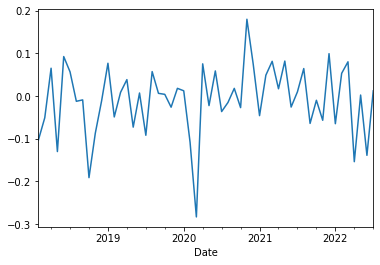

In [12]:
reg_eq.plot()

Interpret the beta coefficients and their corresponding t and p values, and their 95% confidence intervals

DEBEMOS CONSIDERAR QUE EN ESTE CASO LA DISTRIBUCION NORMAL DE LA INFORMACION QUE SE NOS DIÓ, EL VALOR DE LA ESQUNA IZQUIERDA ES SIMILAR AL VALOR DE -0.039, Y PARA LA ESQUINA DERECHA DIFIERE UN POCO, YA QUE PODEMOS VER QUE EL VALOR ES DE 0.023, ASI QUE PODEMOS CONSIDERAR ESTAN ADENTRO DE 2 STD DEVIATIONS, POR LO QUE PODEMOS DECIR QUE AMBOS SON VALIDOS PARA EL 95% DEL DATA. PARA EL CASO DE LA VARIABLE MXX, SU VALOR ESTA AFUERA DE LA DISTRIBUCION ASI QUE PODEMOS RECHAZAR LA HIPOTESIS NULA PARA ESTE CASO.